# Fitting and plotting

Theoretical minimum MAPE: 9.452210816513542
Fit results: [-9.14710287 14.91488788 -5.23385624  0.8666289 ]
MAPE = 9.439769979679811 , MAE = 1.4628843083976053 , MSE = 4.752546583718117 , R2 = 0.964943811473758


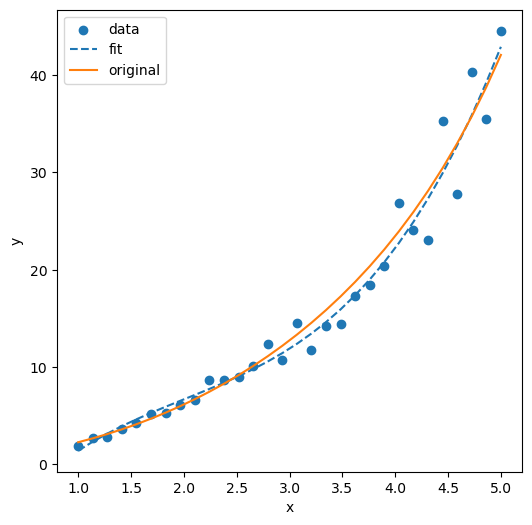

In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import warnings

def exampleRealFunction(x):
    return np.exp(x)/10+x**2+np.sqrt(x)

def thirdOrderPolynomial(x, a, b, c, d):
    """
    A third order polynomial function.
    
    This is the function that is going to be fitted with the data.
    """
    return a + b*x + c*x**2 + d*x**3

amountOfDatapoints = 30
variation = 0.2

x = np.linspace(1, 5, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2 * np.random.rand(amountOfDatapoints) - 1) * variation + 1)# Add random variation to y data
print("Theoretical minimum MAPE:", 100*metrics.mean_absolute_percentage_error(y, exampleRealFunction(x)))

popt, pcov = optimize.curve_fit(thirdOrderPolynomial, x, y)# Make the fit.

fit = thirdOrderPolynomial(x, *popt)# Get the results of the fit.
print("Fit results:", popt)
print("MAPE =", 100*metrics.mean_absolute_percentage_error(y, fit),", MAE =", metrics.mean_absolute_error(y, fit), ", MSE =", metrics.mean_squared_error(y, fit), ", R2 =", metrics.r2_score(y, fit))#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data")
ax.plot(x, fit, '--', label="fit")
ax.plot(x, exampleRealFunction(x), label="original")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

Selected order: order 17 of 20 , MAPE: 11.062163607034877 , minimum MAPE: 11.062163607034877
Coefficients: [ 2.08080586e+04 -1.06447232e+05  2.42237991e+05 -3.25187521e+05
  2.87910276e+05 -1.77920090e+05  7.90907878e+04 -2.56076005e+04
  6.00917385e+03 -9.89155494e+02  1.02335075e+02 -3.40728415e+00
 -8.10463206e-01  1.59035267e-01 -1.46597706e-02  7.94639733e-04
 -2.43497086e-05  3.27608574e-07]


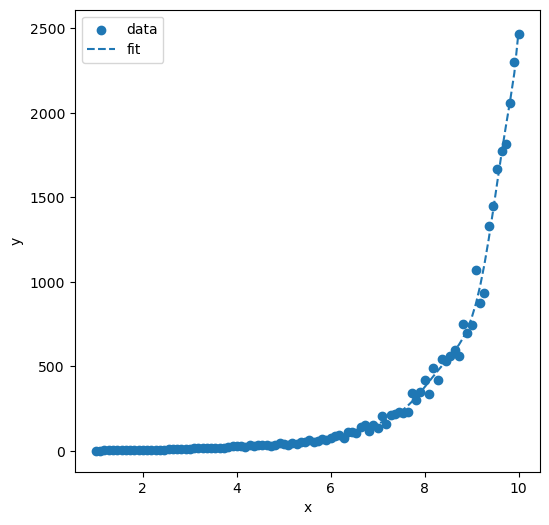

In [17]:
amountOfDatapoints = 100
variation = 0.2

x = np.linspace(1, 10, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2 * np.random.rand(amountOfDatapoints) - 1) * variation + 1)# Add random variation to y data

def polynomialFuction(x, coefficients):
    """
    Calculates an arbetrairy order polynomial of the order of the length of coefficients. Coefficients are the coefficients of each term (starting at 0th order).
    """
    return np.sum([coefficients[i] * x**i for i in range(len(coefficients))])


def makePolynomialFit(xData, yData, displayResults=False, maxOrderFraction=1/5, largestMAPERatio=1.1, warningMAPE=50):
    """
    Fits an (semi-)arbitrary polynomial function to the data and returns the coefficients (the first element is order 0, second order 1, etc) and MAPE, can also print and graph some of the results.
    
    xData is a numpy-list of the x-axis data points.
    yData is a numpy-list of the y-axis data points.
    displayResults determines if the results are printed and plotted.
    maxOrderFraction is used to determine the maximum order to be fitted (as a fraction of the total amount of data points).
    largestMAPERatio is the largest possible MAPE ratio between the selected polynomial (preferable an order as low as possible to prevent overfitting) and the polynomial with the lowest MAPE.
    warningMAPE is the MAPE at which the function will raise a warning if the final fit is higher than it.
    """
    
    maxOrder = int(np.floor(len(xData)*maxOrderFraction))# The largest order which is to be fitted.
    
    MAPEs = []
    for i in range(maxOrder + 1):
        coefficients = np.polynomial.polynomial.Polynomial.fit(xData, yData, i).convert().coef# Make the fit and get the coefficients
        fit = [polynomialFuction(x, coefficients) for x in xData]# Get the values of the fit.
        MAPE = 100*metrics.mean_absolute_percentage_error(yData, fit)
        MAPEs.append(MAPE)
        
        #print(i, "MAPE:", MAPE, "Coef:", coefficients)
        #print(np.polynomial.polynomial.Polynomial.fit(xData, yData, i, full=True)[1][0])
    
    minimumMAPE = min(MAPEs)
    
    for i in range(maxOrder + 1):# Select the polynomial to be used by starting at the lowest order going up until a polynomial can be found which has a low enough MAPE.
        if minimumMAPE*largestMAPERatio > MAPEs[i]:
            selectedOrder = i
            break
    
    coefficients = np.polynomial.polynomial.Polynomial.fit(xData, yData, selectedOrder).convert().coef# Redo the fit since we didn't save all the fits.
    fit = [polynomialFuction(x, coefficients) for x in xData]
    MAPE = 100*metrics.mean_absolute_percentage_error(yData, fit)
    
    if MAPE>=warningMAPE:# Detect if the total result is good enough and else raise a warning.
        warnings.warn("Warning: high MAPE ("+str(np.round(MAPE))+"). A good fit was likely not found, possibly due to the order not being high enough, not enough data points or the data not being smooth enough/growing too hard.")
    
    if displayResults:# If desired print the results and make a plot of the data and fit.
        print("Selected order: order", selectedOrder, "of", maxOrder, ", MAPE:", MAPEs[i], ", minimum MAPE:", minimumMAPE)
        print("Coefficients:", coefficients)
        fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
        ax.scatter(xData, yData, label="data")
        ax.plot(xData, fit, '--', label="fit")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()
        plt.show()
    
    return coefficients, MAPE

coefficients, MAPE = makePolynomialFit(x, y, True)
